# <span style="color:orange"> Final Project: Which Constructor is Able to Produce the Fastest Vehicle? </span>

<font size="4"> 

Nancy Chen, Jessica Sun, Teresa Shi

***

## 1. Introduction

Formula 1, often abbreviated as F1, is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA). It involves highly specialized, open-wheel racing cars competing on circuits around the world. The sport is known for its cutting-edge technology, high speeds, and skilled drivers, who race in a series of Grands Prix throughout the season to compete for the World Drivers' Championship and the Constructors' Championship.

Our project aims to delve into the intricate dynamics of Formula 1 racing by exploring the performance of drivers within each constructor. We are intrigued by the question: Which constructor has the best driver performance? This inquiry is pertinent not only for enthusiasts and fans eager to dissect the nuances of the sport but also for teams and stakeholders seeking insights to optimize their strategies and enhance their competitive edge. By analyzing driver performance across different constructors, we can gain valuable insights into the interplay between team dynamics, technical prowess, and individual skill, shedding light on the factors that contribute to success in this fiercely competitive arena.

By investigating different parameters of speed indicating driver performance, we aim to uncover patterns and trends acrross differrent constructors, providing a comprehensive understanding of the competitive landscape of Formula 1 racing. We plan to use the constructors and resluts dataset for our study. Our analysis will involve exploring key metrics such as average finishing times and fastest lap speeds, followed by in-depth analyses and discussions to unravel the intricacies of Formula 1 performance dynamics. Visulizations and plots are utilized for a more straightforward understanding of the data. We were able to find notivable variances among differentt F1 constructors, in both average finishinng times and fastest lap speed. The differences would provide potential insight into constructor selection as well as future studies on this topic to provide a better undesanding on F1 competition strategies.






***

## 2. Data Description

For our research question, we will be focusing on datasets `constructors` and `results`. The dataset `constructors` provides a table with 211 rows, each records a constructor's ID, its corresponding name, its nationality, as well as its official URL. The dataset `results` is a comprehensive dataset consisting of 25840 observation and 18 variables that provides the performance of drivers. Each row records the performance of a driver in a specific race, including their point, fastest lap time, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import datasets
constructors = pd.read_csv("data_raw/constructors.csv")
results = pd.read_csv("data_raw/results.csv")

In [2]:
print(len(constructors))
print(len(results))

211
25840


### 2.1. Merging Datasets

Since we're interested in paring up the constructor's name (e.g. Toyota) with the actual records of the races, we will merge the `constructors` dataset with `results` based on `constructorId`.

In [3]:
results_const = pd.merge(results[["driverId", "constructorId", "points", "laps", 
                                        "milliseconds", "rank", "fastestLapSpeed"]],
                               constructors[["constructorId", "name"]],
                               on = "constructorId",
                               how = "left").sort_values(by = "constructorId") # sort by constructorId for better examination

results_const.head()

,driverId,constructorId,points,laps,milliseconds,rank,fastestLapSpeed,name
0,1,1,10.0,58,5690616,2,218.300,McLaren
8617,117,1,6.0,69,5992552,\N,\N,McLaren
8647,102,1,9.0,63,6896035,\N,\N,McLaren
8648,117,1,6.0,63,6934748,\N,\N,McLaren
8678,117,1,9.0,80,5857328,\N,\N,McLaren


### 2.2. Cleaning Data

We will exclude the observations with NA values (`\N`, in this dataset) for the convenience of future data manipulation.

In [4]:
results_const.replace(r"\N", np.nan, inplace = True) # replace the "\N" values by nan
cleaned_results_const = results_const.dropna() # drop all nan values
cleaned_results_const = cleaned_results_const.rename(columns = {"name":"constructorName"}) # rename for better understanding

cleaned_results_const.head()

,driverId,constructorId,points,laps,milliseconds,rank,fastestLapSpeed,constructorName
0,1,1,10.0,58,5690616,2,218.300,McLaren
7756,5,1,5.0,57,5771321,7,196.378,McLaren
7778,5,1,3.0,44,5063758,13,232.716,McLaren
7798,5,1,3.0,53,4642399,6,245.036,McLaren
7813,1,1,10.0,61,6966337,2,168.561,McLaren


In order to process the data, we need to transform the data type of columns to numeric and transform the `milliseconds` data to the corresponding time length in minutes for better understanding.

In [5]:
print(cleaned_results_const[["milliseconds"]].dtypes) # check data type of `milliseconds`
cleaned_results_const["milliseconds"] = pd.to_numeric(cleaned_results_const["milliseconds"]) # transfer to numeric data type
cleaned_results_const["minutes"] = cleaned_results_const["milliseconds"] / 60000 # transform to minutes

print(cleaned_results_const[["fastestLapSpeed"]].dtypes) # check data type of `milliseconds`
cleaned_results_const["fastestLapSpeed"] = pd.to_numeric(cleaned_results_const["fastestLapSpeed"]) # transfer to numeric data type

cleaned_results_const.head()

milliseconds    object
dtype: object
fastestLapSpeed    object
dtype: object


,driverId,constructorId,points,laps,milliseconds,rank,fastestLapSpeed,constructorName,minutes
0,1,1,10.0,58,5690616,2,218.300,McLaren,94.843600
7756,5,1,5.0,57,5771321,7,196.378,McLaren,96.188683
7778,5,1,3.0,44,5063758,13,232.716,McLaren,84.395967
7798,5,1,3.0,53,4642399,6,245.036,McLaren,77.373317
7813,1,1,10.0,61,6966337,2,168.561,McLaren,116.105617


### 2.3. Analyse Main Columns

Since we're interested in the difference of speed between vehicles produced by different constructors, we will be mainly focusing on columns including `minutes` (finishing time in minutes) which indicates the average speed, and `fastestLapSpeed` (fastest lap speed (km/h)) which denotes the best dash speed. Here we will show the aggregated summary statistics for each of the variables we're working on. 

In [6]:
totalMinutes_agg = cleaned_results_const.agg(mean_totalMinutes = ('minutes','mean'),
            sd_totalMinutes =   ('minutes','std'),
            min_totalMinutes =  ('minutes','min'),
            max_totalMinutes =  ('minutes','max'),
            count_obs   = ('minutes',len))

display(totalMinutes_agg)

,minutes
mean_totalMinutes,98.356760
sd_totalMinutes,18.094939
min_totalMinutes,70.868200
max_totalMinutes,245.719067
count_obs,3683.000000


In [7]:
fastestSpeed_agg = cleaned_results_const.agg(mean_fastestSpeed = ('fastestLapSpeed','mean'),
            sd_fastestSpeed =   ('fastestLapSpeed','std'),
            min_fastestSpeed =  ('fastestLapSpeed','min'),
            max_fastestSpeed =  ('fastestLapSpeed','max'),
            count_obs   = ('fastestLapSpeed',len))

display(fastestSpeed_agg)

,fastestLapSpeed
mean_fastestSpeed,206.205344
sd_fastestSpeed,20.779461
min_fastestSpeed,148.589000
max_fastestSpeed,257.320000
count_obs,3683.000000


We can also take a look at how many unique constructors are there in our dataset, and examine how many observations, i.e. records of results, exists for each of the constructor.

In [8]:
unique_constructors = pd.unique(cleaned_results_const["constructorName"].sort_values())
print("There are " + str(len(unique_constructors)) + 
      " unique constructors in our cleaned dataset, each of them shown below.")
print(unique_constructors)

cleaned_results_const["constructorName"].value_counts()

There are 30 unique constructors in our cleaned dataset, each of them shown below.
['Alfa Romeo' 'AlphaTauri' 'Alpine F1 Team' 'Aston Martin' 'BAR'
 'BMW Sauber' 'Brawn' 'Caterham' 'Ferrari' 'Force India' 'HRT'
 'Haas F1 Team' 'Honda' 'Jaguar' 'Jordan' 'Lotus' 'Lotus F1'
 'Manor Marussia' 'Marussia' 'McLaren' 'Mercedes' 'Racing Point'
 'Red Bull' 'Renault' 'Sauber' 'Spyker' 'Super Aguri' 'Toro Rosso'
 'Toyota' 'Williams']


Ferrari           581
Red Bull          485
Mercedes          435
McLaren           422
Williams          293
Renault           240
Force India       208
Toro Rosso        175
Sauber            129
BMW Sauber         92
Toyota             91
Lotus F1           79
Haas F1 Team       74
AlphaTauri         57
Alfa Romeo         53
Alpine F1 Team     47
Aston Martin       42
Honda              37
Racing Point       36
BAR                35
Brawn              32
Caterham           12
Marussia           11
Jaguar              7
Manor Marussia      3
Lotus               2
Super Aguri         2
Jordan              1
HRT                 1
Spyker              1
Name: constructorName, dtype: int64

We can see from the table above that Ferrari is the most popular constructor in the race, with 581 records. Red Bull is on the second place, followed by Mercedes and others.

***

## 3. Results

### 3.1. Comparing Average Finishing Time of Each Constructor

To answer our question regards to which constructor has the best drivers, we would like to first plot to see the average finishing time in minutes of each constructor.

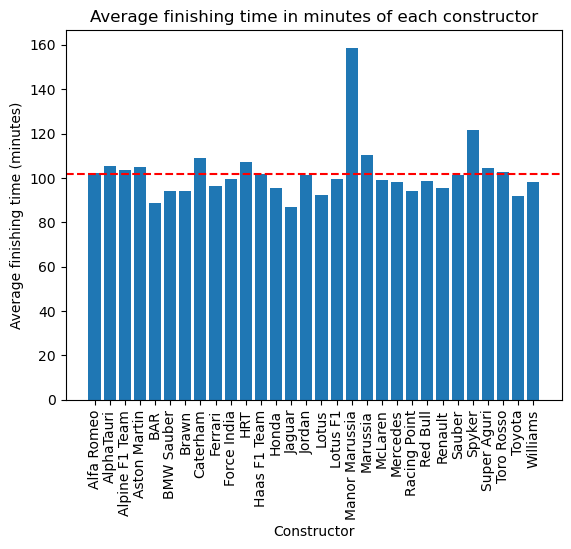

In [9]:
# Calculating the average finishing time of each constructor
mean_min_cont = cleaned_results_const.groupby("constructorName").agg(mean_min=("minutes", "mean"))

# Reset the index to make "constructorName" a regular column
mean_min_cont = mean_min_cont.reset_index()

# Calculate the overall average
overall_average = mean_min_cont["mean_min"].mean()

plt.bar(mean_min_cont["constructorName"], mean_min_cont["mean_min"])
plt.xlabel("Constructor")
plt.ylabel("Average finishing time (minutes)")
plt.title("Average finishing time in minutes of each constructor")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=overall_average, color='r', linestyle='--', label='Overall Average') # Add a horizontal line for overall average
plt.show()


The bar plot shows the average finishing time in munites of each constructor. On the x-axis is each constructor that participated in F1, and on the y-axis is the average finishing time in minutes. The horiontal red line represents the overall average finishing time in minutes among all contrustors. 

In [10]:
mean_min_cont_sorted = mean_min_cont.sort_values(by="mean_min")

mean_min_cont_sorted

,constructorName,mean_min
13,Jaguar,86.982652
4,BAR,88.599480
28,Toyota,91.856364
15,Lotus,92.423483
6,Brawn,94.070616
5,BMW Sauber,94.119229
21,Racing Point,94.277482
12,Honda,95.464377
23,Renault,95.633255
8,Ferrari,96.332720


From the plot as well as the table above, we can see that on average, all drivers finish the race in approximately 100 minutes. Constructor Jaaguar, BAR, and Toyota are the three contructors that have the lowest average finishing time. On the other hand, Manor Marussia, Marussia, and Sypker has the longest average finishing time. 

### 3.2. Comparing Fastest Lap Speed of Each Constructor

In addition to evaluating the average finishing time, we are also interested in assessing the fastest lap speed achieved by drivers representing each constructor. This will allow us to gain deeper insights into the performance of drivers across different teams.

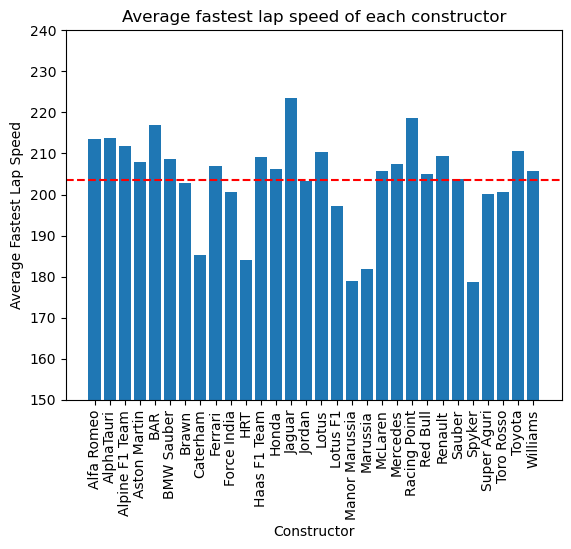

In [11]:
# Calculating the average fastest lap speed of each constructor
mean_speed_cont = cleaned_results_const.groupby("constructorName").agg(mean_speed=("fastestLapSpeed", "mean"))

# Reset the index to make "constructorName" a regular column
mean_speed_cont = mean_speed_cont.reset_index()

# Calculate the overall average
overall_average_speed = mean_speed_cont["mean_speed"].mean()

plt.bar(mean_speed_cont["constructorName"], mean_speed_cont["mean_speed"])
plt.xlabel("Constructor")
plt.ylabel("Average Fastest Lap Speed")
plt.title("Average fastest lap speed of each constructor")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=overall_average_speed, color='r', linestyle='--', label='Overall Average') # Add a horizontal line for overall average
plt.ylim(150, 240) # Set the y-axis range from 150 to 300
plt.show()

The bar plot shows the average fastest lap speed of each constructor. On the x-axis is each constructor that participated in F1, and on the y-axis is the average fastest lap speed. The horiontal red line represents the overall average fastest lap speed among all contrustors. 

In [12]:
mean_speed_cont_sorted = mean_speed_cont.sort_values(by="mean_speed")

mean_speed_cont_sorted

,constructorName,mean_speed
25,Spyker,178.763000
17,Manor Marussia,178.865667
18,Marussia,181.948182
10,HRT,184.078000
7,Caterham,185.195333
16,Lotus F1,197.095582
26,Super Aguri,200.235000
27,Toro Rosso,200.631394
9,Force India,200.730317
6,Brawn,202.806156


From the plot as well as the table above, we can see that on average, all drivers' average fastest lap speed is approximately 205 (km/h). Constructor Jaaguar, Racing Point, and BAR are the three contructors that have the fastest lap speed on average. On the other hand, Sypker, Manor Marussia, and Marussia has the lowest lap speed on average. 

***

## 4. Discussion

Based on the analysis of the data, it is evident that there are notable variations in both the average finishing times and fastest lap speeds among Formula 1 constructors. On average, drivers across all constructors complete races in approximately 100 minutes, with Jaguar, Racing Point, and BAR showcasing the fastest lap speeds, averaging around 205 km/h. Conversely, Spyker, Manor Marussia, and Marussia exhibit the slowest lap speeds on average. These findings underscore the diverse performance capabilities and strategies employed by different constructors, reflecting the complex interplay of factors such as car design, driver skill, and team dynamics in Formula 1 racing. However, our data analysis is preliminary, and further exploration of these patterns could yield valuable insights into the competitive landscape of the sport and inform strategies for enhancing performance and competitiveness among constructors.